<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    Project Team 
    
    
____


### Full Name : Neda Fallah, Bahar Oveis
### Student Number : 98100226 , 98106242

# Introduction

In this project, we are going to have a brief and elementary hands-on real-world project, predicting breast cancer survival using machine learning models with clinical data and gene expression profiles.

# Data Documentation

For this purpose, we will use "Breast Cancer Gene Expression Profiles (METABRIC)" data. 
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "_mut" at the end of the names of the columns) 
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).

# Data Preparation (15 Points)

In this section you must first split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)

In [330]:
#au nom de Dieu
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading & Splitting

In [331]:
df = pd.read_csv("/content/METABRIC_RNA_Mutation.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [332]:
df.head(3)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,mmp26,mmp27,mmp28,mmp3,mmp7,mmp9,mtor,nfkb1,nfkb2,opcml,pdgfa,pdgfb,pdgfra,pdgfrb,pdpk1,peg3,pik3ca,pik3r1,pik3r2,plagl1,ptk2,rab25,rad51,raf1,rassf1,rheb,rictor,rps6,rps6ka1,rps6ka2,rps6kb1,rps6kb2,rptor,slc19a1,smad1,smad2,smad3,smad4,smad5,smad6,smad7,smad9,sptbn1,terc,tert,tgfb1,tgfb2,tgfb3,tgfbr1,tgfbr2,tgfbr3,tsc1,tsc2,vegfa,vegfb,wfdc2,wwox,zfyve9,arid1a,arid1b,cbfb,gata3,kmt2c,kmt2d,myh9,ncor1,pde4dip,ptprd,ros1,runx1,tbx3,abcb1,abcb11,abcc1,abcc10,bbc3,bmf,cyp2c8,cyp3a4,fgf2,fn1,map2,map4,mapt,nr1i2,slco1b3,tubb1,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak,ahnak2,akap9,alk,apc,arid2,arid5b,asxl1,asxl2,bap1,bcas3,birc6,cacna2d3,ccnd3,chd1,clk3,clrn2,col12a1,col22a1,col6a3,ctcf,ctnna1,ctnna3,dnah11,dnah2,dnah5,dtwd2,fam20c,fanca,fancd2,flt3,foxp1,frmd3,gh1,gldc,gpr32,gps2,hdac9,herc2,hist1h2bc,kdm3a,kdm6a,klrg1,l1cam,lama2,lamb3,large1,ldlrap1,lifr,lipi,magea8,map3k10,map3k13,men1,mtap,muc16,myo1a,myo3a,ncoa3,nek1,nf2,npnt,nr2f1,nr3c1,nras,nrg3,nt5e,or6a2,palld,pbrm1,ppp2cb,ppp2r2a,prkacg,prkce,prkcq,prkcz,prkg1,prps2,prr16,ptpn22,ptprm,rasgef1b,rpgr,ryr2,sbno1,setd1a,setd2,setdb1,sf3b1,sgcd,shank2,siah1,sik1,sik2,smarcb1,smarcc1,smarcc2,smarcd1,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,cdh1_mut,dnah2_mut,kmt2d_mut,ush2a_mut,ryr2_mut,dnah5_mut,herc2_mut,pde4dip_mut,akap9_mut,tg_mut,birc6_mut,utrn_mut,tbx3_mut,col6a3_mut,arid1a_mut,lama2_mut,notch1_mut,cbfb_mut,ncor2_mut,col12a1_mut,col22a1_mut,pten_mut,akt1_mut,atr_mut,thada_mut,ncor1_mut,stab2_mut,myh9_mut,runx1_mut,nf1_mut,map2k4_mut,ros1_mut,lamb3_mut,arid1b_mut,erbb2_mut,sf3b1_mut,sha

In [333]:
y = df['overall_survival']
y_df_cln = df['overall_survival']

In [334]:
ls = df.columns

In [335]:
df_cln = df.iloc[:,:31]


In [336]:
mut_list = [s for s in ls if "_mut" in s]
df_mut = df.loc[:,mut_list]

In [337]:
dff = df.iloc[:,31:]
df_exp = dff.drop(columns = mut_list)

In [338]:
print(df_cln.shape)
print(df_exp.shape)
print(df_mut.shape)

(1904, 31)
(1904, 489)
(1904, 173)


## EDA

###clinical


####choose columns

In [339]:
print (df_cln.columns)

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')


In [340]:
df_cln["cancer_type"].value_counts()

Breast Cancer     1903
Breast Sarcoma       1
Name: cancer_type, dtype: int64

In [341]:
del_list = ["patient_id","cancer_type", 'overall_survival',"overall_survival_months","death_from_cancer"] 
df_cln = df_cln.drop(columns=del_list)

In [342]:
pd.set_option('display.max_columns', None)
df_cln.head(5)

,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
0,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10.0,NaN,6.044,IDC,Negative,1,ER-/HER2-,22.0,2.0
1,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0.0,2.0,4.020,IDC,Positive,1,ER+/HER2- High Prolif,10.0,1.0
2,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1.0,2.0,4.030,IDC,Positive,0,NaN,15.0,2.0
3,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,MDLC,Positive,1,NaN,25.0,2.0
4,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Mixed,1,Post,9,Right,8.0,2.0,6.080,MDLC,Positive,1,ER+/HER2- High Prolif,40.0,2.0


####find nulls and replace them

In [343]:
df_cln.isna().sum()

age_at_diagnosis                    0
type_of_breast_surgery             22
cancer_type_detailed               15
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc          30
er_status                           0
neoplasm_histologic_grade          72
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                     45
nottingham_prognostic_index         0
oncotree_code                      15
pr_status                           0
radio_therapy                       0
3-gene_classifier_subtype         204
tumor_size                         20
tumor_stage                       501
dtype: int64

fill numerical columns:

In [344]:
meanVal = df_cln['neoplasm_histologic_grade'].mean()
df_cln['neoplasm_histologic_grade'].fillna(value=meanVal, inplace=True)
meanVal = df_cln['mutation_count'].mean()
df_cln['mutation_count'].fillna(value=meanVal, inplace=True)
meanVal = df_cln['tumor_size'].mean()
df_cln['tumor_size'].fillna(value=meanVal, inplace=True)
meanVal = df_cln['tumor_stage'].mean()
df_cln['tumor_stage'].fillna(value=meanVal, inplace=True)

fill categorical columns:

In [345]:
def fillna(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col
df_cln = df_cln.apply(lambda col:fillna(col))

In [346]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
from matplotlib_venn import venn3
import matplotlib.patches as mpatches
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import warnings
df_cln
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]

In [347]:
print(df_cln.info())
print(df_cln.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_diagnosis                1904 non-null   float64
 1   type_of_breast_surgery          1904 non-null   object 
 2   cancer_type_detailed            1904 non-null   object 
 3   cellularity                     1904 non-null   object 
 4   chemotherapy                    1904 non-null   int64  
 5   pam50_+_claudin-low_subtype     1904 non-null   object 
 6   cohort                          1904 non-null   float64
 7   er_status_measured_by_ihc       1904 non-null   object 
 8   er_status                       1904 non-null   object 
 9   neoplasm_histologic_grade       1904 non-null   float64
 10  her2_status_measured_by_snp6    1904 non-null   object 
 11  her2_status                     1904 non-null   object 
 12  tumor_other_histologic_subtype  19

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

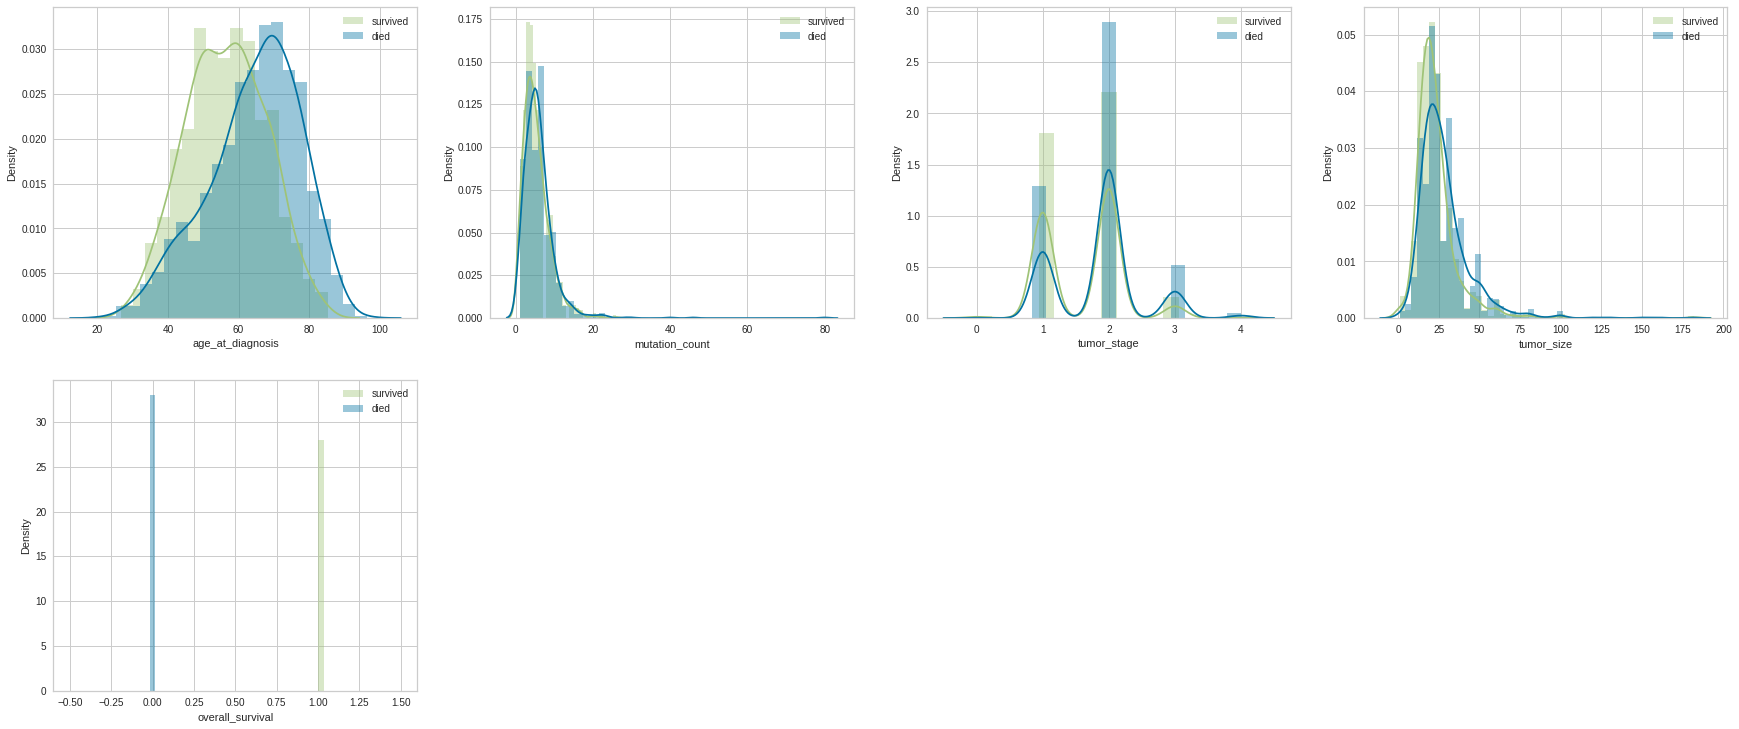

In [348]:
fig = plt.figure(figsize = (30, 40))
j = 0
columns_ls= ['age_at_diagnosis','mutation_count', 'tumor_stage', 'tumor_size' ,'overall_survival']
for i in df[columns_ls].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df[i][df['overall_survival']==1], color='g', label = 'survived')
    sns.distplot(df[i][df['overall_survival']==0], color='b', label = 'died')
    plt.legend(loc='best')
plt.show()

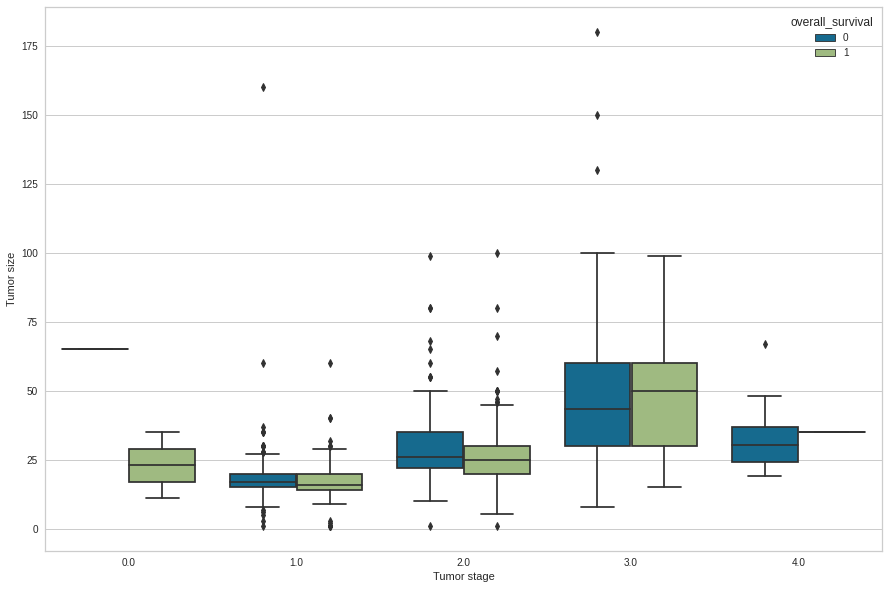

In [349]:
ig, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x ='tumor_stage', y ='tumor_size',  data = df, orient='v', hue='overall_survival')
ax.set_ylabel('Tumor size')
ax.set_xlabel('Tumor stage')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


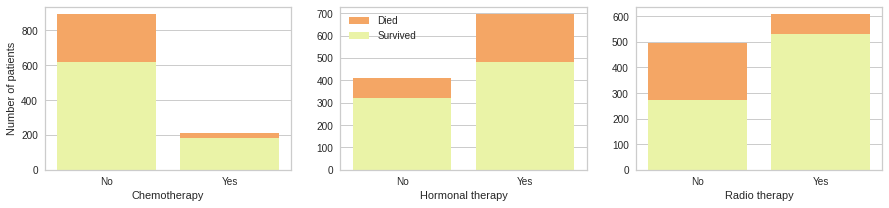

In [350]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
died = df[df['overall_survival']==0]
survived = df[df['overall_survival']==1]

sns.countplot(died['chemotherapy'],color=sns.color_palette(color)[1], label='Died', ax=ax[0], saturation=0.90)
sns.countplot(x=survived['chemotherapy'] , color=sns.color_palette(color)[3],label='Survived', ax=ax[0], saturation=0.90)

ax[0].set(xticklabels=['No','Yes'])
ax[0].set_xlabel('Chemotherapy')
ax[0].set_ylabel('Number of patients')

sns.countplot(died['hormone_therapy'], color=sns.color_palette(color)[1],label='Died', ax=ax[1], saturation=0.90)
sns.countplot(x=survived['hormone_therapy'], color=sns.color_palette(color)[3],label='Survived', ax=ax[1], saturation=0.90)

ax[1].legend()
ax[1].set(xticklabels=['No','Yes'])

sns.countplot(died['radio_therapy'], color=sns.color_palette(color)[1],label='Died', ax=ax[2], saturation=0.90)
sns.countplot(x=survived['radio_therapy'],color=sns.color_palette(color)[3],label='Survived', ax=ax[2], saturation=0.90)

ax[2].set(xticklabels=['No','Yes'])
ax[1].set_xlabel('Hormonal therapy')
ax[1].set_ylabel('')
ax[2].set_xlabel('Radio therapy')
ax[2].set_ylabel('')

plt.show()

<ipython-input-351-741d40462779>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTreatments["type_of_breast_surgery"] = dfTreatments["type_of_breast_surgery"].apply(lambda x: 1 if "MASTECTOMY" in str(x) else 0)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


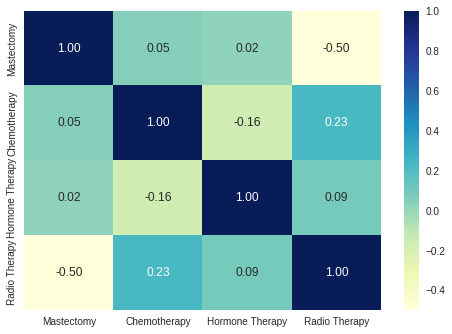

In [351]:
treatmentList = ["type_of_breast_surgery", "chemotherapy", "hormone_therapy", "radio_therapy"]
dfTreatments = df[treatmentList]
dfTreatments["type_of_breast_surgery"] = dfTreatments["type_of_breast_surgery"].apply(lambda x: 1 if "MASTECTOMY" in str(x) else 0)
dfTreatments.rename(columns={"type_of_breast_surgery": "Mastectomy", "chemotherapy": "Chemotherapy", "hormone_therapy": "Hormone Therapy", "radio_therapy": "Radio Therapy"}, inplace=True)
dfTreatmentsCorr = dfTreatments.corr() 
sns.heatmap(dfTreatmentsCorr, cmap = "YlGnBu", annot=True, fmt=".2f")

###EDA : gene Mutation and Expression

In [352]:

print(df_exp.info())
print(df_exp.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 489 entries, brca1 to ugt2b7
dtypes: float64(489)
memory usage: 7.1 MB
None
              brca1         brca2         palb2          pten          tp53  \
count  1.904000e+03  1.904000e+03  1.904000e+03  1.904000e+03  1.904000e+03   
mean  -6.302521e-07 -4.201681e-07  3.676471e-07 -8.928571e-07  6.302521e-07   
std    1.000262e+00  1.000262e+00  1.000263e+00  1.000263e+00  1.000263e+00   
min   -2.444400e+00 -2.783500e+00 -4.384600e+00 -5.932800e+00 -2.481200e+00   
25%   -7.198500e-01 -6.994750e-01 -6.798250e-01 -5.586500e-01 -6.661500e-01   
50%   -1.244500e-01 -5.820000e-02 -2.210000e-02  1.098500e-01 -3.010000e-02   
75%    5.532250e-01  6.290000e-01  6.400000e-01  6.426250e-01  6.447500e-01   
max    4.554200e+00  3.737900e+00  4.615000e+00  3.254100e+00  4.289800e+00   

                atm         cdh1         chek2           nbn          nf1  \
count  1.904000e+03  1904.000000  1.904000e+03  1.90

In [353]:

print(df_mut.info())
print(df_mut.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 173 entries, pik3ca_mut to siah1_mut
dtypes: object(173)
memory usage: 2.5+ MB
None
       pik3ca_mut tp53_mut muc16_mut ahnak2_mut kmt2c_mut syne1_mut gata3_mut  \
count        1904     1904      1904       1904      1904      1904      1904   
unique        160      343       298        248       222       200       128   
top             0        0         0          0         0         0         0   
freq         1109     1245      1578       1593      1670      1672      1674   

       map3k1_mut ahnak_mut dnah11_mut cdh1_mut dnah2_mut kmt2d_mut ush2a_mut  \
count        1904      1904       1904     1904      1904      1904      1904   
unique        194       153        154      140       129       129       134   
top             0         0          0        0         0         0         0   
freq         1706      1728       1729     1732      1754      1764      1765   

       ryr2_mut dnah5

In [354]:
df1UniqueMutations = df_mut
df1GroupedUniqueMutations = pd.DataFrame({"Unique Mutations": df1UniqueMutations.nunique()})
df1GroupedUniqueMutations.sort_values(by='Unique Mutations', ascending=False).head(10)


,Unique Mutations
tp53_mut,343
muc16_mut,298
ahnak2_mut,248
kmt2c_mut,222
syne1_mut,200
map3k1_mut,194
pik3ca_mut,160
dnah11_mut,154
ahnak_mut,153
cdh1_mut,140


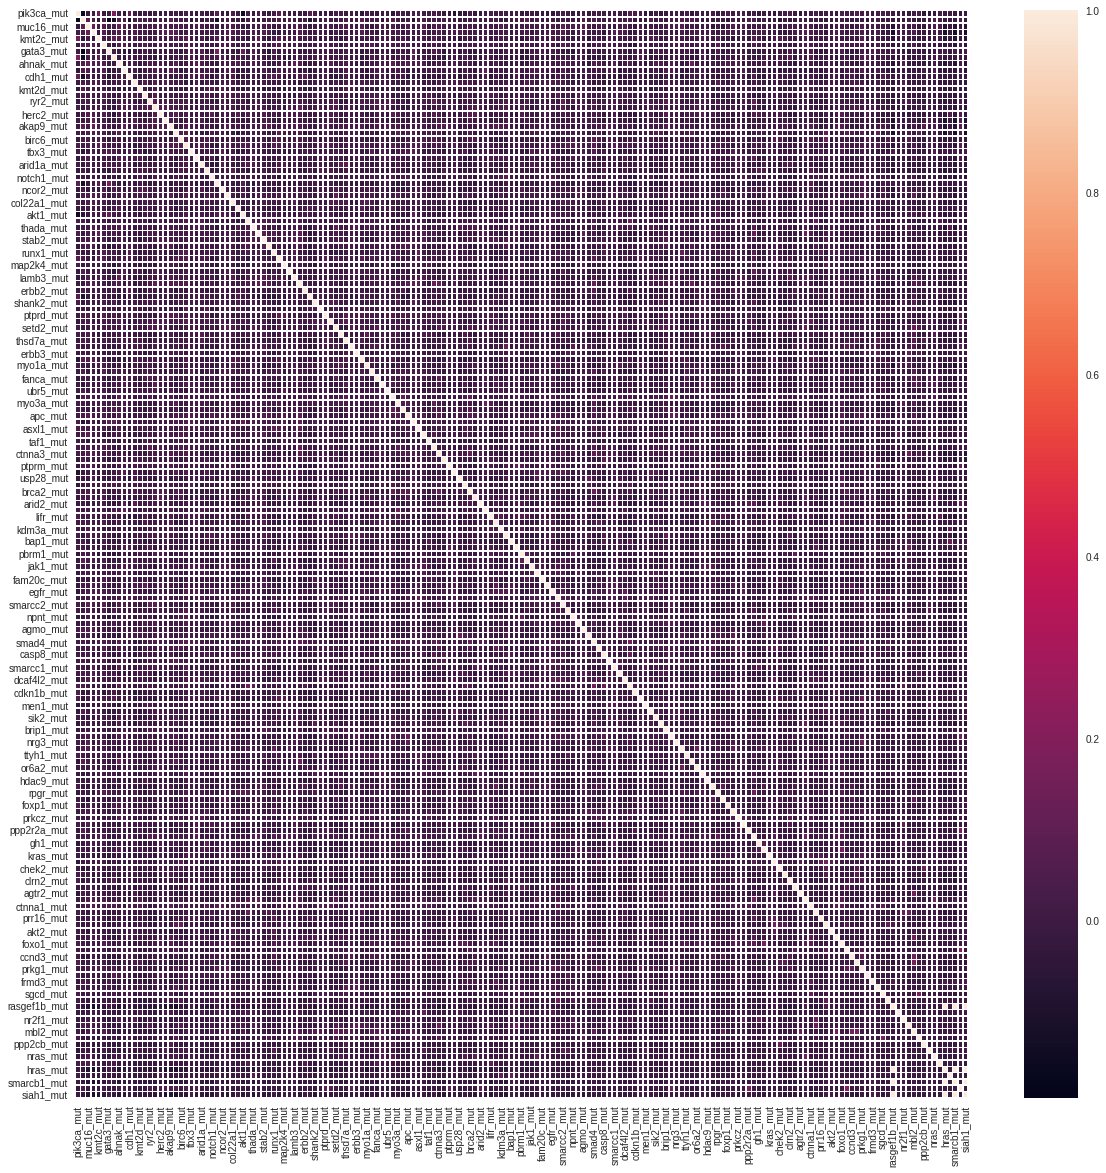

In [355]:
df1UniqueMutationsBinary = df1UniqueMutations.applymap(lambda x: 1 if x != '0' else 0)
corr = df1UniqueMutationsBinary.corr().fillna(0)
plt.figure(figsize=(20,20))
sns.heatmap(corr, linewidths=0.5)

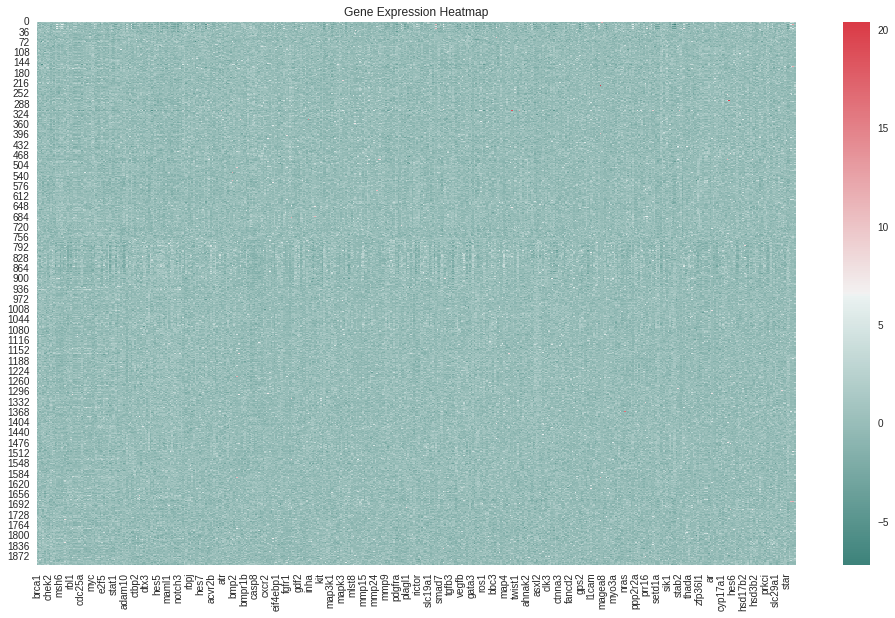

In [356]:
fig, axs = plt.subplots(figsize = (17, 10)) 
sns.heatmap(df_exp, ax = axs, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Gene Expression Heatmap')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

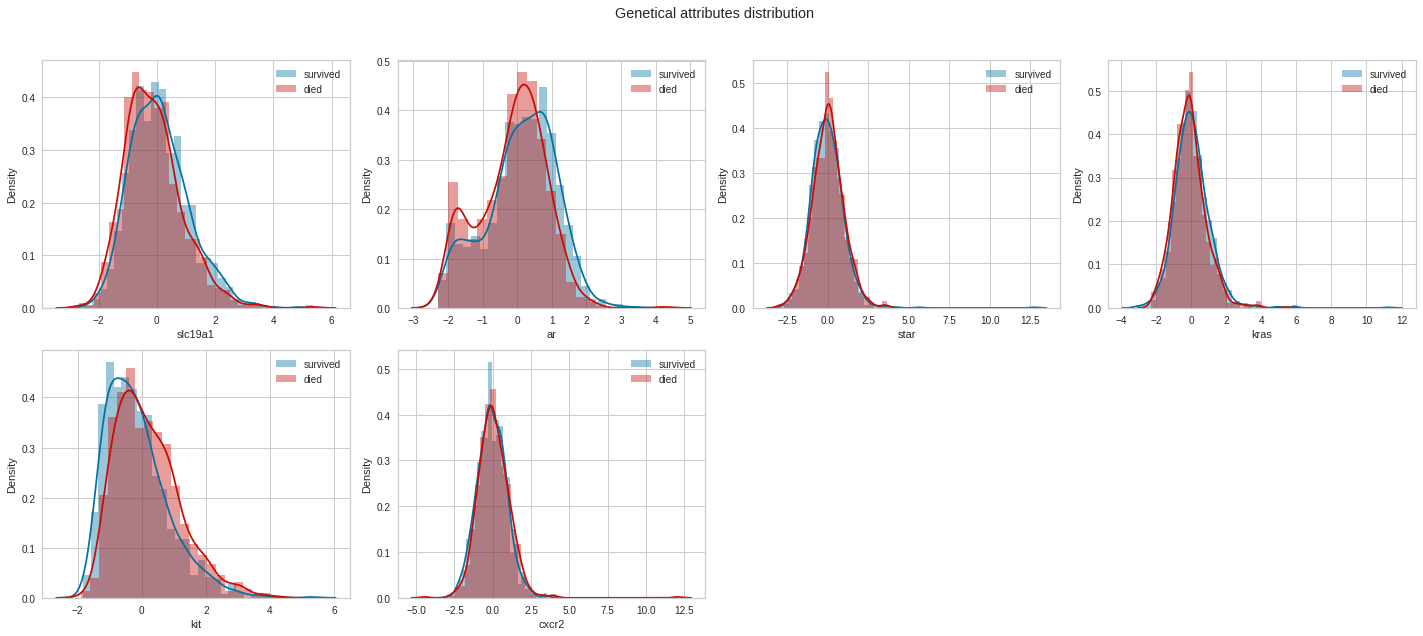

In [357]:
fig = plt.figure(figsize = (20, 25))
j = 0
df_exp_eda = df_exp
df_exp_eda['overall_survival'] = y
g_ls = ['slc19a1', 'ar', 'star', 'kras', 'kit', 'cxcr2']
for i in df_exp_eda.loc[:,g_ls].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df_exp_eda[i][df_exp_eda['overall_survival']==0], color='b', label = 'survived')
    sns.distplot(df_exp_eda[i][df_exp_eda['overall_survival']==1], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Genetical attributes distribution')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

####transform categorical to numerical 


categorical columns: 
'type_of_breast_surgery', 'cancer_type_detailed', 'cellularity', 'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 'er_status', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'pr_status', '3-gene_classifier_subtype',

In [358]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label = le.fit_transform(df_cln['type_of_breast_surgery'])
df_cln.drop("type_of_breast_surgery", axis=1, inplace=True)
df_cln["type_of_breast_surgery"] = label

label = le.fit_transform(df_cln['cancer_type_detailed'])
df_cln.drop("cancer_type_detailed", axis=1, inplace=True)
df_cln["cancer_type_detailed"] = label

label = le.fit_transform(df_cln['cellularity'])
df_cln.drop("cellularity", axis=1, inplace=True)
df_cln["cellularity"] = label

label = le.fit_transform(df_cln['pam50_+_claudin-low_subtype'])
df_cln.drop("pam50_+_claudin-low_subtype", axis=1, inplace=True)
df_cln["pam50_+_claudin-low_subtype"] = label

label = le.fit_transform(df_cln['er_status_measured_by_ihc'])
df_cln.drop("er_status_measured_by_ihc", axis=1, inplace=True)
df_cln["er_status_measured_by_ihc"] = label

label = le.fit_transform(df_cln['er_status'])
df_cln.drop("er_status", axis=1, inplace=True)
df_cln["er_status"] = label

label = le.fit_transform(df_cln['her2_status_measured_by_snp6'])
df_cln.drop("her2_status_measured_by_snp6", axis=1, inplace=True)
df_cln["her2_status_measured_by_snp6"] = label

label = le.fit_transform(df_cln['her2_status'])
df_cln.drop("her2_status", axis=1, inplace=True)
df_cln["her2_status"] = label

label = le.fit_transform(df_cln['tumor_other_histologic_subtype'])
df_cln.drop("tumor_other_histologic_subtype", axis=1, inplace=True)
df_cln["tumor_other_histologic_subtype"] = label

label = le.fit_transform(df_cln['inferred_menopausal_state'])
df_cln.drop("inferred_menopausal_state", axis=1, inplace=True)
df_cln["inferred_menopausal_state"] = label

label = le.fit_transform(df_cln['integrative_cluster'])
df_cln.drop("integrative_cluster", axis=1, inplace=True)
df_cln["integrative_cluster"] = label

label = le.fit_transform(df_cln['primary_tumor_laterality'])
df_cln.drop("primary_tumor_laterality", axis=1, inplace=True)
df_cln["primary_tumor_laterality"] = label

label = le.fit_transform(df_cln['oncotree_code'])
df_cln.drop("oncotree_code", axis=1, inplace=True)
df_cln["oncotree_code"] = label

label = le.fit_transform(df_cln['pr_status'])
df_cln.drop("pr_status", axis=1, inplace=True)
df_cln["pr_status"] = label

label = le.fit_transform(df_cln['3-gene_classifier_subtype'])
df_cln.drop("3-gene_classifier_subtype", axis=1, inplace=True)
df_cln["3-gene_classifier_subtype"] = label

In [359]:
df_cln.head(5)

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,radio_therapy,tumor_size,tumor_stage,type_of_breast_surgery,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,oncotree_code,pr_status,3-gene_classifier_subtype
0,75.65,0,1.0,3.0,1,10.0,5.697687,6.044,1,22.0,2.0,1,1,0,6,1,1,2,0,0,0,4,1,1,0,2
1,43.19,0,1.0,3.0,1,0.0,2.000000,4.020,1,10.0,1.0,0,1,0,2,1,1,2,0,0,1,4,1,1,1,0
2,48.87,1,1.0,2.0,1,1.0,2.000000,4.030,0,15.0,2.0,1,1,0,3,1,1,2,0,0,1,3,1,1,1,1
3,47.68,1,1.0,2.0,1,3.0,1.000000,4.050,1,25.0,2.0,1,4,2,3,1,1,2,0,4,1,10,1,5,1,1
4,76.97,1,1.0,3.0,1,8.0,2.000000,6.080,1,40.0,2.0,1,4,0,3,1,1,2,0,4,0,10,1,5,1,0


In [360]:
#Check which columns are categorical
print(df_cln.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_diagnosis                1904 non-null   float64
 1   chemotherapy                    1904 non-null   int64  
 2   cohort                          1904 non-null   float64
 3   neoplasm_histologic_grade       1904 non-null   float64
 4   hormone_therapy                 1904 non-null   int64  
 5   lymph_nodes_examined_positive   1904 non-null   float64
 6   mutation_count                  1904 non-null   float64
 7   nottingham_prognostic_index     1904 non-null   float64
 8   radio_therapy                   1904 non-null   int64  
 9   tumor_size                      1904 non-null   float64
 10  tumor_stage                     1904 non-null   float64
 11  type_of_breast_surgery          1904 non-null   int64  
 12  cancer_type_detailed            19

## Dimension Reduction (20 + Up to 10 Points Optional)

For each dataset, investigate whether it is needed to use a dimensionality reduction approach or not. If yes, please reduce the dataset's dimension. You can use UMAP for this purpose but any other approach is acceptable. Finding the most important features contains extra points.

###PCA

In [361]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

sc = StandardScaler()
x_std = sc.fit_transform(df_exp)
print(np.mean(x_std))
print(np.std(x_std))
pca = PCA(n_components = 0.80)
pca.fit(x_std)
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
df_exp_pca = pca.transform(x_std)

1.0662405998801022e-18
0.9999999999999999
Number of components: 162


In [362]:
print (df_exp_pca.shape)
print (df_exp.shape)

(1904, 162)
(1904, 490)


###Umap

In [363]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [364]:
import umap

reducer = umap.UMAP(random_state=42,n_components=30)
embedding = reducer.fit_transform(x_std)

In [365]:
df_exp_umap = embedding

print (df_exp_umap.shape)
print (df_exp.shape)

(1904, 30)
(1904, 490)


###most important features

Feature importances:  [2.21598019e-03 0.00000000e+00 1.47668547e-03 6.27248328e-04
 0.00000000e+00 2.07048078e-03 7.35942300e-04 1.88515582e-03
 7.51977747e-04 1.29456280e-03 0.00000000e+00 7.87207833e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.47607953e-03
 0.00000000e+00 1.31086498e-03 1.35486414e-03 2.70761847e-03
 3.25443234e-03 8.31293335e-04 0.00000000e+00 0.00000000e+00
 1.98184113e-04 0.00000000e+00 1.73854989e-03 1.12196895e-03
 4.18413028e-03 1.24668128e-03 9.58455836e-04 9.15455027e-05
 4.51864492e-03 1.33077601e-03 5.30157960e-04 6.80574636e-03
 0.00000000e+00 0.00000000e+00 9.04102721e-04 1.16429009e-02
 1.44557050e-03 2.45250243e-03 2.00159302e-03 8.90845644e-04
 0.00000000e+00 5.88182406e-04 0.00000000e+00 2.29246484e-02
 2.68241308e-03 0.00000000e+00 3.79338448e-03 2.24011128e-03
 1.17203715e-02 1.94559754e-03 0.00000000e+00 1.46100579e-03
 2.57825054e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.66456457e-03 5.43260472e-03 0.00000000e+00 0.00000000e+00
 0

Text(0.5, 1.0, 'Visualizing Important Features')

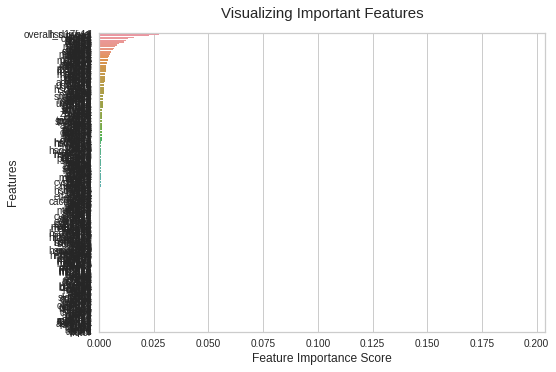

In [366]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

X = df_exp
y = y_df_cln

rf = RandomForestClassifier(n_estimators=100, max_depth=3,
                                 bootstrap=True, n_jobs=-1,
                                 random_state=0)
rf.fit(X, y)
feature_imp = pd.Series(rf.feature_importances_, 
                        index=df_exp.columns).sort_values(ascending=False)
print('Feature importances: ', rf.feature_importances_)
print(sns.barplot(x=feature_imp, y=feature_imp.index))
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features", fontsize=15, pad=15)

In [367]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rf, threshold=0.005)
df_exp_rn = selector.fit_transform(X, y)
print('Data with selected features')
print(pd.DataFrame(df_exp_rn).head(2))

Data with selected features
       0       1       2       3       4       5       6       7       8   \
0  2.5602 -1.8799  1.1097  3.9189 -0.2752 -0.1030  0.1816 -0.7982  0.9947   
1  0.7248 -0.3327  0.9804 -0.4983  1.5911 -0.1606  1.8819 -0.0094  0.8191   

       9       10      11      12      13      14      15      16      17  \
0  2.9336 -0.8050 -0.0349  0.7390  0.2348 -1.4828  2.2907 -0.7012 -1.2999   
1 -0.4866 -0.0552 -0.3739  0.7496  0.8578  0.4945 -0.6814 -0.6919  1.9157   

       18      19      20      21      22      23      24      25      26  \
0 -0.9045  1.6758 -0.3917 -0.4113 -0.0004  2.2128 -0.5296  2.6466 -0.2318   
1 -0.0208 -1.1793  0.9038  0.7791 -1.9854 -0.8652  1.7385  0.3336 -0.0219   

       27      28      29      30      31      32   33  
0 -0.3513  6.4965  1.6822  0.4076  0.5008  2.8796  1.0  
1  0.4480  0.5189 -0.7837 -0.1878 -0.1047  0.2446  1.0  


# Classic Model (25 Points)

In this section, you must implement a classic classification model for clinical, gene expressions, and reduced gene expressions datasets. Using Random Forest is suggested. (minimum acceptable accuracy = 60%)

In [368]:
# Random forest on clinical dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_cln, y, test_size = 0.33, random_state = 42)

In [369]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=300)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [370]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6772655007949125


In [371]:
# Random forest on gene dataset
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_exp, y, test_size = 0.33, random_state = 42)

In [372]:
#Import Random Forest Model

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train2,y_train2)

y_pred2=clf.predict(X_test2)


In [373]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))


Accuracy: 0.9984101748807631


In [374]:
# Random forest on reduced gene dataset
from sklearn.model_selection import train_test_split
#pca
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_exp_pca, y, test_size = 0.33, random_state = 42)

In [375]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train3,y_train3)
y_pred3=clf.predict(X_test3)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.7440381558028617


In [376]:
#Train the model using the training sets y_pred=clf.predict(X_test)
#umap
X_train4, X_test4, y_train4, y_test4 = train_test_split(df_exp_umap, y, test_size = 0.33, random_state = 42)
clf.fit(X_train4,y_train4)
y_pred4=clf.predict(X_test4)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.6168521462639109


# Neural Network (30 Points)

In this section, you must implement a neural network model for clinical, gene expressions and reduced gene expressions datasets. Using the MPL models is suggested. (minimum acceptable accuracy = 60%)

In [377]:
# TODO
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


#creating model
classifier = Sequential()

classifier.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
classifier.add(Dense(8, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))


#taking summary of layers
#classifier.summary()

#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


#fitting the ANN to the training set
model = classifier.fit(X_train,y_train,batch_size=100,epochs=100)
y_pred_nn=classifier.predict(X_test)


Epoch 1/100
13/13 [==============================] - 2s 7ms/step - loss: 1.7563 - accuracy: 0.4471
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 1.0754 - accuracy: 0.4980
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 0.8769 - accuracy: 0.5639
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.8484 - accuracy: 0.5639
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.8070 - accuracy: 0.5569
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 0.7799 - accuracy: 0.5639
Epoch 7/100
13/13 [==============================] - 0s 10ms/step - loss: 0.7583 - accuracy: 0.5686
Epoch 8/100
13/13 [==============================] - 0s 11ms/step - loss: 0.7393 - accuracy: 0.5671
Epoch 9/100
13/13 [==============================] - 0s 9ms/step - loss: 0.7237 - accuracy: 0.5725
Epoch 10/100
13/13 [==============================] - 0s 10ms/step - loss: 0.7116 - accuracy: 0.5686
Epoc

In [378]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
test_loss, test_acc = classifier.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

20/20 [==============================] - 1s 7ms/step - loss: 0.6101 - accuracy: 0.6820
Test Loss: 0.6101207137107849
Test Accuracy: 0.682034969329834


In [379]:
classifier.summary()


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 10)                270       
                                                                 
 dense_70 (Dense)            (None, 8)                 88        
                                                                 
 dense_71 (Dense)            (None, 1)                 9         
                                                                 
Total params: 367
Trainable params: 367
Non-trainable params: 0
_________________________________________________________________


In [380]:
#geneexp
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
classifier2 = Sequential()

classifier2.add(Dense(12, activation='relu', input_dim=X_train2.shape[1]))
classifier2.add(Dense(8, activation='relu'))
classifier2.add(Dense(1, activation='sigmoid'))


#compiling the ANN
classifier2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



classifier2.fit(X_train2, y_train2, batch_size=100, epochs=100)
y_pred_nn2 = classifier2.predict(X_test2)

test_loss2, test_acc2 = classifier2.evaluate(X_test2, y_test2)
print("Test Loss:", test_loss2)
print("Test Accuracy:", test_acc2)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.7411 - accuracy: 0.5765
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6235
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6000 - accuracy: 0.6596
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5668 - accuracy: 0.7090
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5421 - accuracy: 0.7420
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy: 0.7663
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.7945
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.8141
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4433 - accuracy: 0.8290
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4176 - accuracy: 0.8384
Epoch 11/

In [381]:
#pca
classifier3 = Sequential()

classifier3.add(Dense(10, activation='relu', input_dim=X_train3.shape[1]))
classifier3.add(Dense(8, activation='relu'))
classifier3.add(Dense(1, activation='sigmoid'))


#compiling the ANN
classifier3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model3=classifier3.fit(X_train3,y_train3,batch_size=100,epochs=100)
y_pred_nn3=classifier3.predict(X_test3)
test_loss3, test_acc3 = classifier3.evaluate(X_test3, y_test3)
print("Test Loss:", test_loss3)
print("Test Accuracy:", test_acc3)

Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 0.7604 - accuracy: 0.5757
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.6361
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6187 - accuracy: 0.6784
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5757 - accuracy: 0.7192
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7404
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5004 - accuracy: 0.7796
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.8024
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8275
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.8439
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 0.8675
Epoch 11/

In [382]:
#umap
classifier4 = Sequential()

classifier4.add(Dense(10, activation='relu', input_dim=X_train4.shape[1]))
classifier4.add(Dense(8, activation='relu'))
classifier4.add(Dense(1, activation='sigmoid'))

#compiling the ANN
classifier4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model4=classifier4.fit(X_train4,y_train4,batch_size=100,epochs=100)
y_pred_nn4=classifier4.predict(X_test4 )
test_loss4, test_acc4 = classifier4.evaluate(X_test4, y_test4)
print("Test Loss:", test_loss4)
print("Test Accuracy:", test_acc4)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 2.7910 - accuracy: 0.4259
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.8424 - accuracy: 0.5075
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.8120 - accuracy: 0.5733
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7267 - accuracy: 0.4792
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7083 - accuracy: 0.5341
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7012 - accuracy: 0.5733
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7007 - accuracy: 0.5216
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7001 - accuracy: 0.5804
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7001 - accuracy: 0.5318
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6974 - accuracy: 0.5694
Epoch 11/

# Model Comparison (10 Points)

Compare different models and different datasets (clinical, gene expressions, and gene reduced expressions) and try to explain their differences.

#### \# TODO
Random Forest Results: 
Clinical:0.68
Gene Exp:0.63
Reduced Gene Exp:
-PCA: 0.62
-Umap: 0.58
 

Neural Network Results:
Clinical: 0.69
Gene Exp: 0.60
Reduced Gene Exp:
-PCA: 0.56
-Umap: 0.60

Random forest works better(probably because of the size of the data). Clinical dataset is a better indicator. Normal gene expression is better thant the reduced ones.